## Author: Shrikant U
***

 # The Sparks Foundation
 ***

 ## Data Science & Business Analytics Intern

 ## Task 1: Prediction using Supervised ML
***
Probelm Statement: What will be predicted score if a student studies for 9.25 hrs/ day?

Data_Source: http://bit.ly/w-data

***

# Step 1: Importing all required libraries...

In [147]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Preprocessing...

In [148]:
# dataset loading

url = 'http://bit.ly/w-data'
dataset = pd.read_csv(url)

# checking out first 5 rows from dataset..
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking dataset sahpe i.e. no. of rows and columns respectively.

dataset.shape

(25, 2)

In [4]:
# Checking dataset column datatypes.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking ifor null values.

dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

#### Conclusion(step 2): 
* No null values present in dataset
* All datatypes in int & float datatype.
* we can proceed for next steps

# Step 2: EDA

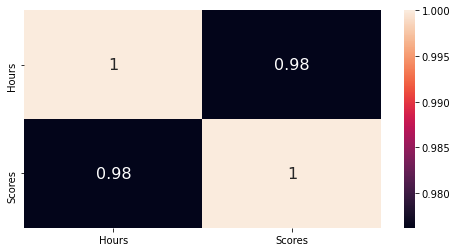

In [6]:
# Correlation matrix heatmap.

plt.figure(figsize=(8,4))
sns.heatmap(dataset.corr(), annot=True, annot_kws={'size':16})
plt.show()

 #### The relation between two variable is: strong positive correlation.

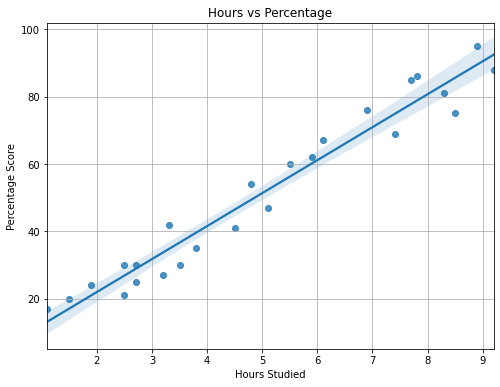

In [7]:
# Plotting regressor plot..

plt.figure(figsize=(8,6))
sns.regplot(x='Hours', y='Scores',data = dataset)
plt.grid()
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

 #### Plot shows strong positive linear relation between variables

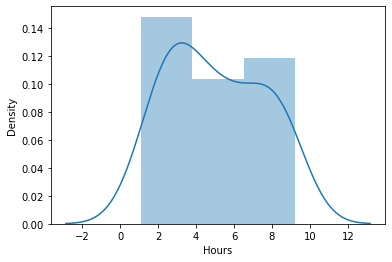

In [8]:
# Checking Hours column data distribution.

sns.distplot(dataset.Hours)
plt.show()

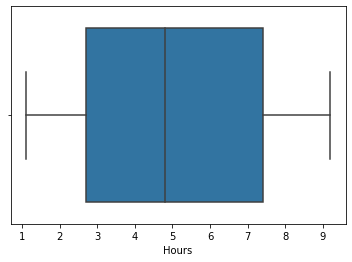

In [9]:
sns.boxplot(dataset.Hours)
plt.show()

 #### It looks data is normally distributed.

# Step 3: train_test data splitting

In [68]:
# Seperate out depedent & indepdent variable

# Note: variable to be predict is depdent variable & all remaining variables are depedent variables

x = dataset['Hours'].values.reshape(-1, 1)  # indepdent variable
y = dataset['Scores'].values.reshape(-1, 1) # depedent variable

In [69]:
# train_test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size=0.3)

# Step 4: Model Building

In [70]:
# training the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [71]:
# predicting scores using x_train

y_pred_train = regressor.predict(x_train)

# predicting scores using x_test
y_pred_test = regressor.predict(x_test)

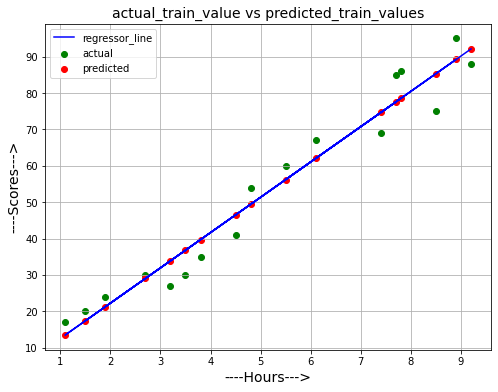

In [72]:
# plotting actual vs predicted value plot

plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color = "green")
plt.scatter(x_train, y_pred_train, color = "red")
plt.plot(x_train, y_pred_train, color = "blue")
plt.grid()
plt.legend(['regressor_line','actual', 'predicted'])
plt.title('actual_train_value vs predicted_train_values', fontdict={'fontsize':14})
plt.xlabel('----Hours--->',fontdict={'fontsize':14})
plt.ylabel('----Scores--->', fontdict={'fontsize':14})
plt.show()

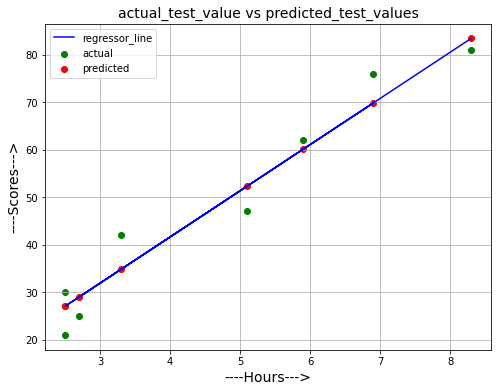

In [73]:
# plotting actual vs predicted value plot

plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color = "green")
plt.scatter(x_test, y_pred_test, color = "red")
plt.plot(x_test, y_pred_test, color = "blue")
plt.grid()
plt.legend(['regressor_line','actual', 'predicted'])
plt.title('actual_test_value vs predicted_test_values', fontdict={'fontsize':14})
plt.xlabel('----Hours--->',fontdict={'fontsize':14})
plt.ylabel('----Scores--->', fontdict={'fontsize':14})
plt.show()

# Step 5: Model Evalution.

In [74]:

from sklearn.metrics import mean_squared_error, r2_score

# root mean squared error on test data
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test)).round(2)
rmse

4.86

#### R2-Square: (total variance explained by model) / total variance.

In [75]:
print('train score...')
print('-'*15)
print(r2_score(y_train, y_pred_train).round(2))

train score...
---------------
0.95


In [76]:
print('test score...')
print('-'*15)
print(r2_score(y_test, y_pred_test).round(2))

test score...
---------------
0.95


# Step 6: Model Cross validation Score

In [77]:
from sklearn.model_selection import cross_val_score, KFold

folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# for train data
cross_val_score(LinearRegression(), x_train, y_train, scoring='r2',cv=folds).mean().round(2)

0.94

In [78]:
# for test data
cross_val_score(regressor, x_test, y_test, scoring='r2',cv=folds).mean().round(2)

0.86

* So our model accuracy will be max 0.86

# Step 7: User Interface for predictions using model

In [145]:
# Writting fuction so that we can use repeatatively for prediction..

def predict_result(hours):
    ''' hours: int or float'''
    hrs = np.array(float(hours)).reshape(-1,1)
    predict = regressor.predict(hrs).round(2)
    print('to get "{}%" score, student has to study for atleast "{}hours"..!!'.format(predict.item(),hours))

In [146]:
predict_result(9.25)

to get "92.62%" score, student has to study for atleast "9.25hours"..!!
